На obrázku vidíte rôzne geometrické tvary (krużnice, trojuholníky, štvorce a šestuholníky) s rôznymi otočeniami. Zistite počet jednotlivých typov.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io, transform
from skimage.color import rgb2gray
from typing import Tuple, Optional, List, Dict
from scipy import ndimage, signal

In [100]:
path = "/content/figures.jpg"
img = io.imread(path)

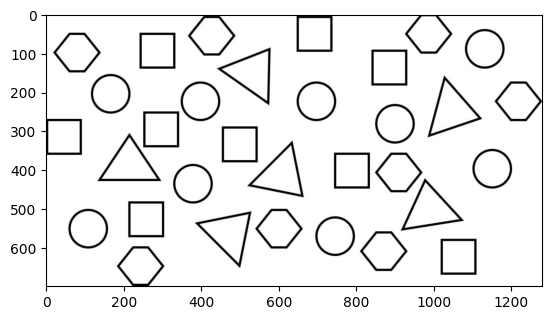

In [101]:
plt.imshow(img)
plt.show()

In [102]:
def DmytroVarich(
    img: np.ndarray,
    show_img: bool = False,
) -> Dict[str, int]:

    # Convert the image to grayscale and convert to uint8
    img_gray = rgb2gray(img)
    img_gray = (img_gray * 255).astype(np.uint8)

    # Applying binarization
    _, thresh = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

    # Finding the contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialization the dictionary for counting figures
    n_figures = {}

    # Contour approximation
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
        num_verticles = len(approx)  # Number of corners

        # Determine the center of the figure (for captions)
        M = cv2.moments(contour)
        if M["m00"] != 0:
          cx = int(M["m10"] / M["m00"])
          cy = int(M["m01"] / M["m00"])
        else:
          continue

        # Filtering shapes by number of corners
        if num_verticles == 3:
          shape_name = "Triangle"
          color = (0, 0, 255)
          n_figures[shape_name] = n_figures.get(shape_name, 0) + 1
        elif num_verticles == 4:
          shape_name = "Square"
          color = (0, 255, 0)
          n_figures[shape_name] = n_figures.get(shape_name, 0) + 1
        elif num_verticles == 6:
          shape_name = "Hexagon"
          color = (255, 0, 0)
          n_figures[shape_name] = n_figures.get(shape_name, 0) + 1
        else:
          # Check to see if it looks like a circle
          area = cv2.contourArea(contour)
          perimeter = cv2.arcLength(contour, True)
          circularity = 4 * np.pi * area / (perimeter ** 2) if perimeter != 0 else 0

          if circularity > 0.75: # Close to 1 -> circle
            shape_name = "Circle"
            color = (255, 255, 0)
            n_figures[shape_name] = n_figures.get(shape_name, 0) + 1
          else:
            continue
        # Drawing the contours
        cv2.drawContours(img, [approx], 0, color, 3)
        cv2.putText(img, shape_name, (cx - 40, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show Results
    if show_img:
      plt.title("Detected Shapes")
      plt.imshow(img)
      plt.axis("off")
      plt.show()

    return n_figures

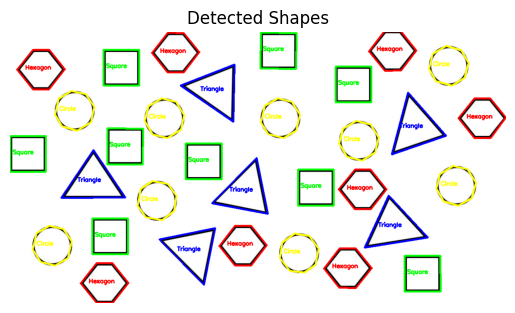

In [103]:
shapes = DmytroVarich(img, True)

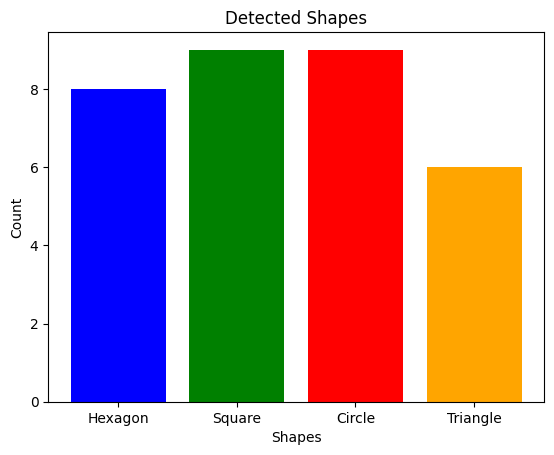

Shape      | Count
--------------------
Hexagon    | 8
Square     | 9
Circle     | 9
Triangle   | 6


In [104]:
plt.bar(shapes.keys(), shapes.values(), color=['blue', 'green', 'red', 'orange'])
plt.xlabel("Shapes")
plt.ylabel("Count")
plt.title("Detected Shapes")
plt.show()

print(f"{'Shape':<10} | Count")
print("-" * 20)

for shape, count in shapes.items():
  print(f"{shape:<10} | {count}")